# Csgo Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import psycopg2
import scipy.stats
# from collections import Counter

# conn = psycopg2.connect(database="test", user="postgres", password="0000", host="localhost", port="5432")

### Cleaning Data

In [4]:
df = pd.read_csv('profiles.csv')

In [5]:
# df = pd.read_sql("SELECT * FROM csgo.profiles", conn)
# print(df.info())
# print('Null object :',df.isnull().any().sum())
# print('Shape'+str(df.shape))

In [6]:
# Drop values that shouldn't be NaN for normal players
df = df.dropna(subset=['total_kills','total_deaths','total_time_played','total_rounds_played',
                                             'total_shots_fired'])
# Fill NaN
df.fillna(0, inplace=True)

# Add Kill Death Ratio
df['kill_death_ratio'] = df['total_kills'].div(df['total_deaths'] ,axis='index')

# Exclude unreasonable data
df = df[(df['total_time_played'] != 0) & (df['total_shots_fired'] != 0) & (df['total_deaths'] != 0) & (df['total_kills'] != 0) &
        (df['total_shots_fired']>df['total_kills']) & (df['total_kills_headshot']<df['total_kills']) &  
        (df['total_time_played'] <= 1963*12*60*60) & (df['total_mvps']<df['total_rounds_played']) & 
        (df['total_deaths']<1963*12*30) & (df['total_kills']<df['total_rounds_played']*9) & (df['kill_death_ratio']<=15)]

# Game released in 21Aug2013, the latest updated profile in data is 5Jan2018, game hours played should not exceed 1963 days
# Total MVP should be less than total rounds played
# Max game round per hour is 30, total death should not exceed 1963days*12hour*30rounds
# Exclude more than 9 kills per round
# Exclude Kill Death ratio exceed 15

df.shape

(75408, 18)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75408 entries, 5 to 84391
Data columns (total 18 columns):
user_id                 75408 non-null int64
nickname                75408 non-null object
total_kills             75408 non-null float64
total_deaths            75408 non-null float64
total_time_played       75408 non-null float64
total_kills_headshot    75408 non-null float64
total_shots_hit         75408 non-null float64
total_mvps              75408 non-null float64
total_wins              75408 non-null float64
total_rounds_played     75408 non-null float64
total_shots_fired       75408 non-null float64
rank_id                 75408 non-null int64
goal_id                 75408 non-null int64
steam_id                75408 non-null float64
about                   75408 non-null object
updated_at              75408 non-null object
compensation            75408 non-null float64
kill_death_ratio        75408 non-null float64
dtypes: float64(12), int64(3), object(3)
memory usage:

In [8]:
df.head(20)

,user_id,nickname,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,about,updated_at,compensation,kill_death_ratio
5,145,Eugene,1.0,9.0,1216.0,0.0,8.0,0.0,2.0,16.0,11.0,1,1,7.656120e+16,0,2017-12-09 03:10:28.514889+00,0.0,0.111111
8,216,Rz-Baron,47887.0,60368.0,4726211.0,14766.0,148706.0,3122.0,22932.0,45169.0,844161.0,11,1,7.656120e+16,0,2017-12-09 03:10:28.803997+00,0.0,0.793251
10,154,dreamteam.gg,310.0,344.0,9229.0,85.0,1604.0,0.0,28.0,51.0,9192.0,1,3,7.656120e+16,0,2017-12-09 03:10:28.940558+00,0.0,0.901163
11,187,FuN1111,82.0,110.0,10472.0,24.0,335.0,9.0,44.0,80.0,3124.0,1,1,7.656120e+16,0,2017-12-09 03:10:29.11863+00,0.0,0.745455
13,176,KhinShen,104506.0,134275.0,2510854.0,31266.0,91449.0,2743.0,8728.0,18005.0,420633.0,8,1,7.656120e+16,0,2017-12-09 03:10:30.121044+00,0.0,0.778298
14,219,NiFall,42387.0,28211.0,2064934.0,14573.0,139742.0,4814.0,15685.0,27894.0,837688.0,8,2,7.656120e+16,0,2017-12-09 03:10:30.30907+00,0.0,1.502499
16,189,adzuma,45239.0,36772.0,3349786.0,18167.0,139443.0,6655.0,24288.0,47078.0,726799.0,16,3,7.656120e+16,0,2017-12-09 03:10:30.61495+00,0.0,1.230257
17,183,Ablaze,9687.0,9284.0,723996.0,3683.0,32367.0,1169.0,5194.0,9939.0,187014.0,18,3,7.656120e+16,Top player EU,2017-12-09 03:10:30.795407+00,0.0,1.043408
18,185,amillern,303.0,147.0,15628.0,125.0,1043.0,48.0,117.0,206.0,4972.0,1,1,7.656120e+16,0,2017-12-09 03:10:31.045224+00,0.0,2.061224
20,194,JcK,24826.0,24588.0,1430353.0,11942.0,69276.0,6702.0,16905.0,32009.0,392248.0,13,2,7.656120e+16,0,2017-12-09 03:10:31.290241+00,0.0,1.009680


In [9]:
df.describe()

,user_id,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,compensation,kill_death_ratio
count,75408.000000,7.540800e+04,75408.000000,7.540800e+04,7.540800e+04,7.540800e+04,75408.000000,7.540800e+04,7.540800e+04,7.540800e+04,75408.000000,75408.000000,7.540800e+04,75408.0,75408.000000
mean,51869.860559,3.347832e+04,31583.216993,2.000750e+06,1.328896e+04,1.245550e+05,3498.330548,1.367331e+04,2.755515e+04,5.827236e+05,10.850732,2.335203,7.655308e+16,0.0,1.098469
std,29092.146217,3.574802e+04,33307.778140,1.992659e+06,1.784226e+04,5.476255e+06,4302.663910,1.380116e+04,2.083728e+05,7.239360e+06,4.738698,0.771422,7.885420e+14,0.0,0.458218
min,2.000000,1.000000e+00,1.000000,8.700000e+01,0.000000e+00,5.000000e+00,0.000000,0.000000e+00,2.000000e+00,1.100000e+01,1.000000,1.000000,0.000000e+00,0.0,0.000675
25%,27073.750000,1.065400e+04,9947.750000,6.593285e+05,3.403000e+03,3.323775e+04,1055.000000,4.663000e+03,8.825750e+03,1.809772e+05,7.000000,2.000000,7.656120e+16,0.0,0.913980
50%,51996.500000,2.359700e+04,22574.000000,1.492532e+06,8.238000e+03,7.547700e+04,2482.000000,1.030500e+04,2.018100e+04,4.110340e+05,11.000000,3.000000,7.656120e+16,0.0,1.037991
75%,76996.250000,4.491500e+04,42416.000000,2.783598e+06,1.696025e+04,1.402945e+05,4801.000000,1.912125e+04,3.770650e+04,7.621885e+05,15.000000,3.000000,7.656120e+16,0.0,1.180294
max,102075.000000,1.103536e+06,640459.000000,7.332304e+07,1.001366e+06,1.500003e+09,681118.000000,1.306899e+06,5.677531e+07,1.980065e+09,18.000000,3.000000,7.656120e+16,0.0,13.111460


In [10]:
# Clippling data, starts testing kstest from 75% of the data, and add 0.5% of the data in each iteration
def clippling(data, body=0.75, cut=50, distfit=scipy.stats.t , dist='t' , printout = True):
    import math
    length = len(data)
    
    seg =  np.round(np.linspace(-math.ceil(length*(1-body)),-1, num=cut))
    ks= []
    p = []
    for s in seg:
        params = distfit.fit(data_sorted[:int(s)])
        i,j = scipy.stats.kstest(data_sorted[:int(s)], cdf=dist, args=params)
        ks.append(i)
        p.append(j)
        if printout == True:
            print(str('Data tail: ')+str(int(s))+str(', Kstest: ')+str(i)+str(', Pvalue: ')+str(j))
                
    return seg,ks,p

In [11]:
def detailclipping(data, startnum=200, endnum=0, distfit=scipy.stats.t , dist='t', printout = True ): 
    data_sorted = np.sort(data)

    ks = []
    p = []
    n = []
    num = np.arange(startnum, endnum)
    for clip_count in num:
        clipped_data = data_sorted[:-clip_count]
        params = distfit.fit(clipped_data)
        i,j = scipy.stats.kstest(clipped_data, dist, params)
        ks.append(i)
        p.append(j)
        n.append(clip_count)
        if printout == True:
            if clip_count % 100 == 0:
                print('Finished iteration %i, kstest: %s' %(clip_count, i))
        d = {'datanumber': n, 'kstest': ks, 'pvalue': p}
        dc = pd.DataFrame(data=d)
    return n, ks, p, dc

### Plot - Total Kills / Total Deaths  

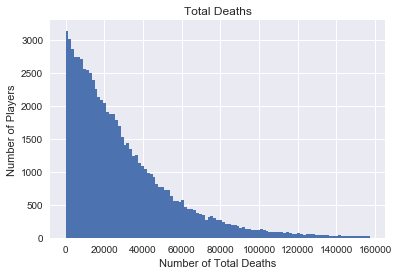

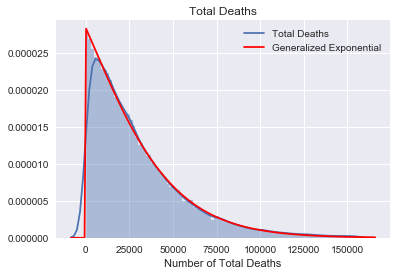

Total Deaths
median: 22574.0
mean: 31583.2169929
mode: ModeResult(mode=array([ 2024.]), count=array([11]))
minimum value: 1
maximum value: 640459
Standard deviation: 33307.7781396
kurtosis: 24.556979886938826
Skewness: 3.4028618870948444
quantile 99% value: 157365.8999999998
quantile 90% value: 68652.0
quantile 75% value: 42416.0
quantile 50% value: 22574.0
quantile 25% value: 9947.75

Genexpon: KstestResult(statistic=0.021180872225892877, pvalue=8.2500246215266828e-30)
Expon: KstestResult(statistic=0.021191112297753778, pvalue=7.7274452027610129e-30)



In [15]:
cols = ['total_deaths']
col_names = ['Total Deaths']

sns.set()
for col_names, cols in zip(col_names, cols):
       
    q = df[cols].quantile(.99)
    i = df.loc[df[cols] <= q][cols]  
    plt1 = plt.hist(i,bins='auto')
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.ylabel('Number of Players')
    plt.show(plt1)
    
    plt2 = sns.distplot(i, bins='auto',kde = True, fit = scipy.stats.genexpon,
                        kde_kws={"label": col_names}, fit_kws={"color": "r", "alpha": 1, "label": "Generalized Exponential"})
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.legend(loc='best', frameon=False)
    plt.show(plt2)
    
    print(col_names)
    print('median: '+ str(np.median(df[cols])))
    print('mean: '+ str(np.mean(df[cols])))
    print('mode: '+ str(scipy.stats.mode(df[cols])))
    print('minimum value: '+str(int(min(df[cols]))))
    print('maximum value: '+str(int(max(df[cols]))))
    print('Standard deviation: '+str(pd.DataFrame.std(df[cols])))
    print('kurtosis: '+str(scipy.stats.kurtosis(df[cols])))
    print('Skewness: '+str(scipy.stats.skew(df[cols])))
    print('quantile 99% value: '+ str(df[cols].quantile(.99)))
    print('quantile 90% value: '+ str(df[cols].quantile(.90)))
    print('quantile 75% value: '+ str(df[cols].quantile(.75)))
    print('quantile 50% value: '+ str(df[cols].quantile(.50)))
    print('quantile 25% value: '+ str(df[cols].quantile(.25)))
    print('')
    data = np.sort(df[cols])
    test = scipy.stats.genexpon.fit(data)
    test2 = scipy.stats.expon.fit(data)
    print('Genexpon: '+str(scipy.stats.kstest(data, cdf='genexpon', args=test)))
    print('Expon: '+str(scipy.stats.kstest(data, cdf='expon', args=test2)))
    print('')


### Log Plot - Total Kills / Total Deaths

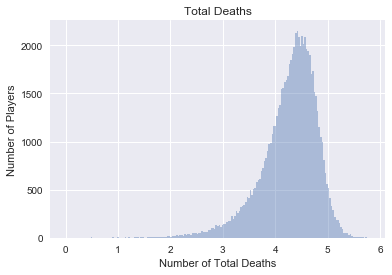

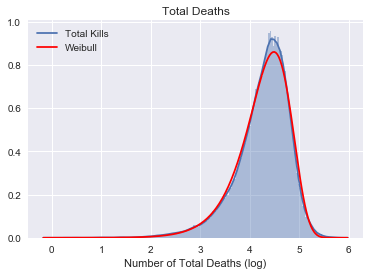

Total Deaths
median: 4.35360852071
mean: 4.26215683893
mode: ModeResult(mode=array([ 3.30621051]), count=array([11]))
minimum value: 0
maximum value: 5
Standard deviation: 0.537526512366
kurtosis: 2.781249100889908
Skewness: -1.19857530593878
quantile 75% value: 4.627529710389018
quantile 50% value: 4.353608520708639
quantile 25% value: 3.9977248619338552

KstestResult(statistic=0.015376814151234319, pvalue=6.5182528931441188e-16)



In [16]:
cols = ['total_deaths']
col_names = ['Total Deaths']


sns.set()
for col_names, cols in zip(col_names, cols):
    
    i=np.log10(df[cols])
    plt1 = sns.distplot(i, bins='auto', kde = False)
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.ylabel('Number of Players')
    plt.show(plt1)
        
    plt2 = sns.distplot(i, bins='auto', kde = True, fit = scipy.stats.weibull_min, 
                        kde_kws={"label": "Total Kills"}, fit_kws={"color": "r", "alpha": 1, "label": "Weibull"})
    plt.title(col_names)
    plt.xlabel('Number of '+col_names+' (log)')
    plt.legend(loc='best', frameon=False)
    plt.show(plt2)
    
    print(col_names)
    print('median: '+ str(np.median(i)))
    print('mean: '+ str(np.mean(i)))
    print('mode: '+ str(scipy.stats.mode(i)))
    print('minimum value: '+str(int(min(i))))
    print('maximum value: '+str(int(max(i))))
    print('Standard deviation: '+str(pd.DataFrame.std(i)))
    print('kurtosis: '+str(scipy.stats.kurtosis(i)))
    print('Skewness: '+str(scipy.stats.skew(i)))
    print('quantile 75% value: '+ str(i.quantile(.75)))
    print('quantile 50% value: '+ str(i.quantile(.50)))
    print('quantile 25% value: '+ str(i.quantile(.25)))
    print('')
    data = np.sort(i)
    test = scipy.stats.weibull_min.fit(data)
    print(scipy.stats.kstest(data, cdf='weibull_min', args=test))
    print('')

### Clipping point - Total Deaths

In [19]:
seg, ks, p = clippling(df['total_deaths'], distfit=scipy.stats.expon , dist='expon', printout = True)

Data tail: -18852, Kstest: 0.104735627882, Pvalue: 0.0
Data tail: -18467, Kstest: 0.104676718453, Pvalue: 0.0
Data tail: -18083, Kstest: 0.10406616718, Pvalue: 0.0
Data tail: -17698, Kstest: 0.103260392704, Pvalue: 0.0
Data tail: -17313, Kstest: 0.102431497281, Pvalue: 0.0
Data tail: -16928, Kstest: 0.101584460261, Pvalue: 0.0
Data tail: -16544, Kstest: 0.100717433345, Pvalue: 0.0
Data tail: -16159, Kstest: 0.0998396792375, Pvalue: 0.0
Data tail: -15774, Kstest: 0.0990104803986, Pvalue: 0.0
Data tail: -15390, Kstest: 0.0981549680348, Pvalue: 0.0
Data tail: -15005, Kstest: 0.0972675007401, Pvalue: 0.0
Data tail: -14620, Kstest: 0.0963512788703, Pvalue: 0.0
Data tail: -14235, Kstest: 0.095401866005, Pvalue: 0.0
Data tail: -13851, Kstest: 0.0944334102076, Pvalue: 0.0
Data tail: -13466, Kstest: 0.0934401247357, Pvalue: 0.0
Data tail: -13081, Kstest: 0.0924213771195, Pvalue: 0.0
Data tail: -12697, Kstest: 0.091284889817, Pvalue: 0.0
Data tail: -12312, Kstest: 0.0903120991721, Pvalue: 0.0
Da

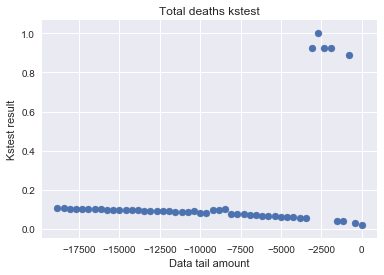

In [20]:
sns.set()
plt.scatter(seg, ks)
plt.xlabel('Data tail amount')
plt.ylabel('Kstest result')
plt.title('Total deaths kstest')
plt.show()

In [21]:
seg4, ks4, p4, dc4 = detailclipping(df['total_deaths'], startnum=1, endnum=700, distfit=scipy.stats.expon , dist='expon', printout = True)

Finished iteration 100, kstest: 0.879071014449
Finished iteration 200, kstest: 0.026252813727
Finished iteration 300, kstest: 0.0279646799075
Finished iteration 400, kstest: 0.0294544348644
Finished iteration 500, kstest: 0.030863992505
Finished iteration 600, kstest: 0.89138998633


In [22]:
dc4.sort_values('kstest').head(20)

,datanumber,kstest,pvalue
0,1,0.021249,5.335628e-30
1,2,0.021303,3.790382e-30
2,3,0.021352,2.755291e-30
3,4,0.021394,2.101690e-30
4,5,0.021450,1.468170e-30
5,6,0.021497,1.081948e-30
6,7,0.021544,8.005289e-31
7,8,0.021589,5.977121e-31
8,9,0.021634,4.461528e-31
9,10,0.021677,3.373071e-31


taking the whole dataset actually gives the min kstest result

### Rank/frequency plot - Total Kills / Total Deaths

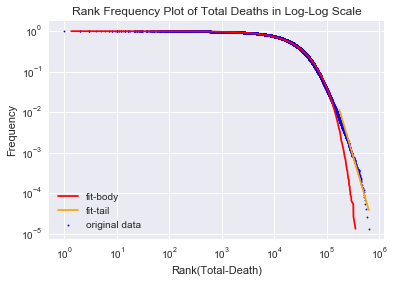

Slope -4.417209, Intercept 48.897265


In [44]:
sns.set()
       
data_sorted = np.sort(df['total_deaths'])
rank = np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1)

# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1, label='plot6')

# Plot points
plt.scatter(data_sorted, rank, color='blue', s=2)

# Plot exponential
clip_start = 26

params = scipy.stats.expon.fit(data_sorted[:-clip_start])
x_axis = np.sort(scipy.stats.expon.rvs(*params, len(rank)))
plt.plot(x_axis, rank, color='red')
ax.set_xscale('log')
ax.set_yscale('log')
    
# Plot tail
clip_start = 86
lin_data = data_sorted[-clip_start:]
lin_rank = rank[-clip_start:]

### Fitting linear data
slope, intercept, r_value, p_value, stderr = scipy.stats.linregress(np.log(lin_data), np.log(lin_rank))
draw_data = data_sorted[-(clip_start+400):]
draw_rank = rank[-(clip_start+400):]
# y_axis = np.log(lin_data) * slope + intercept
y_axis = np.log(draw_data) * slope + intercept
plt.plot(draw_data, np.exp(y_axis), color='orange')  
# plt.plot(lin_data, np.exp(y_axis), color='orange')  


plt.title('Rank Frequency Plot of Total Deaths in Log-Log Scale')
plt.legend(['fit-body', 'fit-tail','original data'])
plt.xlabel('Rank(Total-Death)')
plt.ylabel('Frequency')
plt.show()
print('Slope %f, Intercept %f' %(slope, intercept))

### Plot - Kill Death Ratio

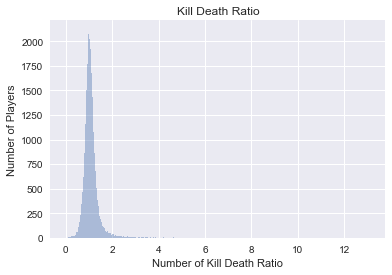

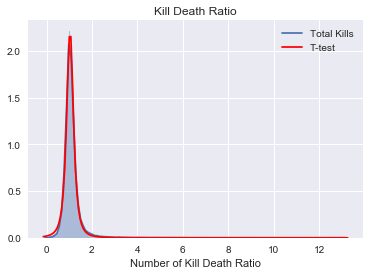

Kill Death Ratio
median: 1.03799115275
mean: 1.0984685896332935
mode: ModeResult(mode=array([ 1.]), count=array([19]))
minimum value: 0.000674763832659
maximum value: 13.1114599686
Standard deviation: 0.45821825643710073
kurtosis: 115.54909072955958
Skewness: 8.069724307409315
quantile 75% value: 1.1802943285016672
quantile 50% value: 1.037991152745251
quantile 25% value: 0.9139799389368546
Result for T-test: KstestResult(statistic=0.034324428461269353, pvalue=1.3577883850416964e-77)



In [25]:
cols = ['kill_death_ratio']
col_names = ['Kill Death Ratio']

sns.set()
for col_names, cols in zip(col_names, cols):
    
    plt1 = sns.distplot(df[cols], bins='auto', kde = False)
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.ylabel('Number of Players')
    plt.show(plt1)
        
    plt2 = sns.distplot(df[cols], bins='auto', kde = True, fit = scipy.stats.t, 
                        kde_kws={"label": "Total Kills"}, fit_kws={"color": "r", "alpha": 1, "label": "T-test"})
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.legend(loc='best', frameon=False)
    plt.show(plt2)
       
    
    print(col_names)
    print('median: '+ str(np.median(df[cols])))
    print('mean: '+ str(np.mean(df[cols])))
    print('mode: '+ str(scipy.stats.mode(df[cols])))
    print('minimum value: '+str((min(df[cols]))))
    print('maximum value: '+str((max(df[cols]))))
    print('Standard deviation: '+str(pd.DataFrame.std(df[cols])))
    print('kurtosis: '+str(scipy.stats.kurtosis(df[cols])))
    print('Skewness: '+str(scipy.stats.skew(df[cols])))
    print('quantile 75% value: '+ str(df[cols].quantile(.75)))
    print('quantile 50% value: '+ str(df[cols].quantile(.50)))
    print('quantile 25% value: '+ str(df[cols].quantile(.25)))
    
    data0 = np.sort(df[cols])
    test = scipy.stats.t.fit(data0)   
    print('Result for T-test: '+str(scipy.stats.kstest(data0, cdf='t', args=test)))

    print('')

### Clipping point in between the body and the tail

Data tail: -18852, Kstest: 0.0727209350641, Pvalue: 3.29099875586e-260
Data tail: -18467, Kstest: 0.0712870422824, Pvalue: 9.15421763581e-252
Data tail: -18083, Kstest: 0.0696800652039, Pvalue: 3.51583736094e-242
Data tail: -17698, Kstest: 0.0683733427153, Pvalue: 9.22641753038e-235
Data tail: -17313, Kstest: 0.0671332735004, Pvalue: 7.6032683614e-228
Data tail: -16928, Kstest: 0.0657644259636, Pvalue: 4.11475180227e-220
Data tail: -16544, Kstest: 0.0644782620287, Pvalue: 5.45175194065e-213
Data tail: -16159, Kstest: 0.0629963547745, Pvalue: 1.16925701919e-204
Data tail: -15774, Kstest: 0.0616415122793, Pvalue: 3.07298385708e-197
Data tail: -15390, Kstest: 0.0600588307799, Pvalue: 1.82524063415e-188
Data tail: -15005, Kstest: 0.0584951169153, Pvalue: 6.04448649328e-180
Data tail: -14620, Kstest: 0.0568568359426, Pvalue: 4.1226163564e-171
Data tail: -14235, Kstest: 0.0554177595084, Pvalue: 1.31558655698e-163
Data tail: -13851, Kstest: 0.0540157986147, Pvalue: 1.98556527813e-156
Data tai

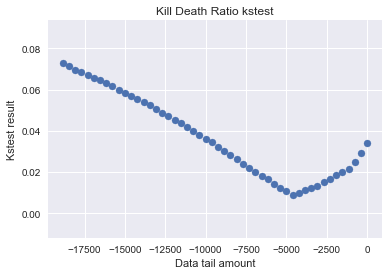

In [26]:
seg, ks, p = clippling(df['kill_death_ratio'], distfit=scipy.stats.t , dist='t', printout = True)
sns.set()
plt.scatter(seg, ks)
plt.xlabel('Data tail amount')
plt.ylabel('Kstest result')
plt.title('Kill Death Ratio kstest')
plt.show()

In [27]:
seg, ks, p, dc = detailclipping(df['kill_death_ratio'], startnum=4400, endnum=5000,
                                distfit=scipy.stats.t , dist='t' , printout = True)

Finished iteration 4400, kstest: 0.00910748042027
Finished iteration 4500, kstest: 0.00863085285051
Finished iteration 4600, kstest: 0.0089319885814
Finished iteration 4700, kstest: 0.00933959725841
Finished iteration 4800, kstest: 0.00980071501373
Finished iteration 4900, kstest: 0.0101672408743


In [28]:
dc.sort_values('kstest').head(5)

,datanumber,kstest,pvalue
113,4513,0.008577,0.000059
112,4512,0.008579,0.000059
114,4514,0.008580,0.000059
111,4511,0.008581,0.000058
110,4510,0.008583,0.000058


clipping point = 4513

### Plot - Kill Death Ratio

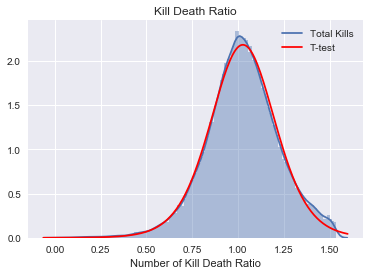

Kill Death Ratio (body)
median: 1.02368664814
mean: 1.02467940275
mode: ModeResult(mode=array([ 1.]), count=array([19]))
minimum value: 0.000674763832659
maximum value: 1.53448275862
Standard deviation: 0.199044914348
kurtosis: 0.8165997061138834
Skewness: -0.23655504950136946

Result for body: KstestResult(statistic=0.0085769262595708495, pvalue=5.9031181904834922e-05)


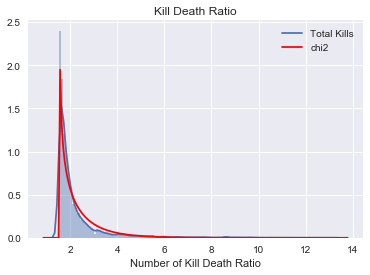

Kill Death Ratio (tail)
median: 1.84114165607
mean: 2.25762755352
mode: ModeResult(mode=array([ 2.48645021]), count=array([6]))
minimum value: 1.53448402858
maximum value: 13.1114599686
Standard deviation: 1.20693673694
kurtosis: 17.45614376114555
Skewness: 3.7099590078213422

Result for tail: KstestResult(statistic=0.096985470157073372, pvalue=2.6874750510519915e-37)


In [29]:
cols = ['kill_death_ratio']
col_names = ['Kill Death Ratio']

sns.set()
for col_names, cols in zip(col_names, cols):
    
    
    plt1 = sns.distplot(np.sort(df[cols])[:-4513], bins='auto', kde = True, fit = scipy.stats.t, 
                        kde_kws={"label": "Total Kills"}, fit_kws={"color": "r", "alpha": 1, "label": "T-test"})
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.legend(loc='best', frameon=False)
    plt.show(plt1)
    
    i1 = np.sort(df[cols])[:-4513]
    print('Kill Death Ratio (body)')
    print('median: '+ str(np.median(i1)))
    print('mean: '+ str(np.mean(i1)))
    print('mode: '+ str(scipy.stats.mode(i1)))
    print('minimum value: '+str((min(i1))))
    print('maximum value: '+str((max(i1))))
    print('Standard deviation: '+str(np.std(i1)))
    print('kurtosis: '+str(scipy.stats.kurtosis(i1)))
    print('Skewness: '+str(scipy.stats.skew(i1)))
    print('')
    data1 = np.sort(df[cols])[:-4513]
    test = scipy.stats.t.fit(data1)   
    print('Result for body: '+str(scipy.stats.kstest(data1, cdf='t', args=test)))
    
    plt2 = sns.distplot(np.sort(df[cols])[-4513:], bins='auto', kde = True, fit = scipy.stats.chi2, 
                        kde_kws={"label": "Total Kills"}, fit_kws={"color": "r", "alpha": 1, "label": "chi2"})
    plt.title(col_names)
    plt.xlabel('Number of '+col_names)
    plt.legend(loc='best', frameon=False)
    plt.show(plt2)
    
    i2 = np.sort(df[cols])[-4513:]
    print('Kill Death Ratio (tail)')
    print('median: '+ str(np.median(i2)))
    print('mean: '+ str(np.mean(i2)))
    print('mode: '+ str(scipy.stats.mode(i2)))
    print('minimum value: '+str((min(i2))))
    print('maximum value: '+str((max(i2))))
    print('Standard deviation: '+str(np.std(i2)))
    print('kurtosis: '+str(scipy.stats.kurtosis(i2)))
    print('Skewness: '+str(scipy.stats.skew(i2)))
    print('')
    data2 = np.sort(df[cols])[-4513:]
    test = scipy.stats.chi2.fit(data2)   
    print('Result for tail: '+str(scipy.stats.kstest(data2, cdf='chi2', args=test)))

### Rank/frequency plot - Kill Death Ratio

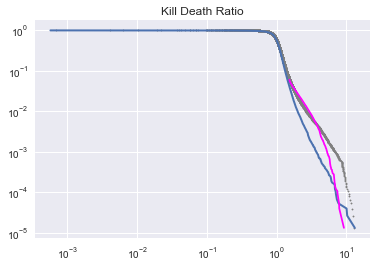

In [30]:
data_sorted = np.sort(df['kill_death_ratio'])
rank = np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1)

# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1, label='plot6')

# Plot points
plt.scatter(data_sorted, rank, color='gray', s=2)

# Plot T-test
params = scipy.stats.t.fit(data_sorted)
x_axis = np.sort(scipy.stats.t.rvs(*params, len(rank)))
plt.plot(x_axis, rank, color='C0', linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
    
# Plot tail
clip_start = 4513

lin_data = data_sorted[-clip_start:]
lin_rank = rank[-clip_start:]

params = scipy.stats.chi2.fit(lin_data)
x_axis = np.sort(scipy.stats.chi2.rvs(*params, len(lin_rank)))

plt.plot(x_axis, lin_rank, color='fuchsia')
plt.title('Kill Death Ratio')    
    
plt.show()